## Lasso Regression

#### TL;DR

In [8]:
from sklearn.preprocessing import MinMaxScaler # Feature transformation 
from sklearn.linear_model import Lasso # Algorithm

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1), 
                        copy=True)

ALG = Lasso(alpha=1.0, 
            fit_intercept=True, 
            normalize=False, 
            precompute=False, 
            copy_X=True, 
            max_iter=1000, 
            tol=0.0001, 
            warm_start=False, 
            positive=False, 
            random_state=None, 
            selection='cyclic')

scaler, ALG

(MinMaxScaler(copy=True, feature_range=(0, 1)),
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False))

### 1. Example with code

In [10]:
# Load cleaned and preprocessed CSV file as a dataframe.
# ------------------------------------------------------
import os # Files
import pandas as pd # Tables
import matplotlib.pyplot as plt # Plots
from sklearn.model_selection import train_test_split # ML

fp = os.path.join('', 'tweets_sentiment.csv')    # Open file
df = pd.read_csv(fp, sep='\t', encoding='utf-8') # Load as dataframe

<b>Example problem</b>: Predict tweet sentiment basing on it's  nr of hashtags, retweet and like counts. 

<b>Example data</b>: consists of 3800 tweets obtained by twitter search API on phrases like psychology + AI (and simillar) saved and cleaned previously as a tweets_sentiment.csv file. Features:

In [11]:
df.head(3)

,tweet,hashtags,hashtags_number,likes,retweets,sentiment,sentiment_class
0,vanguardsw rt chboursin ai achieve human like ...,human-like skills,2,0,7,0.2200,Positive
1,windy interview really groundbreaking can t wr...,interview groundbreaking. head DeepState reali...,6,0,3,0.2000,Positive
2,ai s top researchers think artificial general ...,ai’s ai artificialintelligence agi human,5,1,0,-0.0125,Negative


- <b>tweet</b>           - tweet text.
- <b>hashtags</b>        - #hashtags in a tweet.
- <b>hashtags_number</b> - number of hashtags.
- <b>likes</b>           - number of tweet likes 
- <b>retweets</b>        - number of times tweet have been shared.
- <b>sentiment</b>       - score in range: -1.0 to 1.0 .
- <b>sentiment_class</b> - score simplified to: Positive ( > 0) and Negative ( < 0).

<b>Example code:</b>

R-squared - train: 0.0
R-squared - test:  -0.17
Coefficient: [-29.14878367   0.        ]
Intercept:  25.164627344510535
First three predictions (of 950): [12.83244964  4.98470019  7.22691432] ...


/home/luke/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


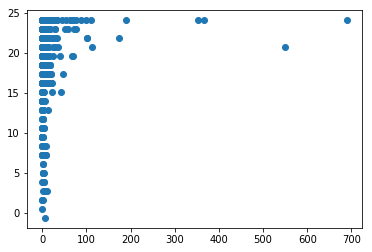

In [14]:
# Lasso Regression

# Divide data into features(X) and labels(y).
X =  df.loc[ :, ['hashtags_number','sentiment']] # features
y =  df.loc[ :, 'retweets'] # label, value to predict

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Transform features: normalization
scaler = MinMaxScaler(feature_range=(0, 1), 
                      copy=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Load and define Lasso Regression.
LASSO = Lasso(alpha=1.0, 
              fit_intercept=True, 
              normalize=False, 
              precompute=False, 
              copy_X=True, 
              max_iter=1000, 
              tol=0.0001, 
              warm_start=False, 
              positive=False, 
              random_state=None, 
              selection='cyclic')

# Fit data into model.
LASSO.fit(X_train_scaled, y_train)

# Results.
coef = LASSO.coef_
intercept = LASSO.intercept_
r_squared_train = round(LASSO.score(X_train_scaled, y_train), 2)
r_squared_test  = round(LASSO.score(X_test_scaled,  y_test), 2)
predictions = LASSO.predict(X_test_scaled) # an array.

# Display results.
print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

### 2. Key info
- Linear model
- [ADD MORE],
- (To be updated.)

### 3. Quick use template

In [ ]:
import os # Get file
import pandas as pd # Read as pandas table; dataframe (df).
from sklearn.model_selection import train_test_split # Train/Test set divide.
from sklearn.preprocessing import MinMaxScaler # Feature transformation 
from sklearn.linear_model import Lasso # Algorithm
import matplotlib.pyplot as plt # Plots

# You fill three lines below.
# ---------------------------
file_name   = 'your file_name.csv' # csv file in same dir  as this notebook.
predit_what = 'column_name' # The label to predict.
based_on    = ['column_name', 'column_name'] # The features to use in this quest.

# Modify if you want to specify full file path / use existing dataframe. 
fp = os.path.join('', file_name) # fp = 'home/data/file_path.csv'
df = pd.read_csv(fp, sep='\t', encoding='utf-8') # df = my_df 


# Lasso Regression

# Divide data into features(X) and labels(y).
X =  df.loc[ :, based_on]    # features
y =  df.loc[ :, predit_what] # label

# Split both features(X) and labels(y) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Transform features: normalization
scaler = MinMaxScaler(feature_range=(0, 1), 
                      copy=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Load and define Lasso Regression.
LASSO = Lasso(alpha=1.0, 
              fit_intercept=True, 
              normalize=False, 
              precompute=False, 
              copy_X=True, 
              max_iter=1000, 
              tol=0.0001, 
              warm_start=False, 
              positive=False, 
              random_state=None, 
              selection='cyclic')

# Fit data into model.
LASSO.fit(X_train_scaled, y_train)

# Results.
coef = LASSO.coef_
intercept = LASSO.intercept_
r_squared_train = round(LASSO.score(X_train_scaled, y_train), 2)
r_squared_test  = round(LASSO.score(X_test_scaled,  y_test), 2)
predictions = LASSO.predict(X_test_scaled) # an array.

# Display results.
print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

#### Nobody aint got time for comments?

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # Feature transformation 
from sklearn.linear_model import Lasso # Algorithm
import matplotlib.pyplot as plt

fp = os.path.join('', 'your file_name.csv')
df = pd.read_csv(fp, sep='\t', encoding='utf-8')

X =  df.loc[ :, ['feature_column_name', 'feature_column_name']]
y =  df.loc[ :, 'label_column_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LASSO = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

coef = LASSO.coef_
intercept = LASSO.intercept_
r_squared_train = round(LASSO.score(X_train_scaled, y_train), 2)
r_squared_test  = round(LASSO.score(X_test_scaled,  y_test), 2)
predictions = LASSO.predict(X_test_scaled) # an

print('R-squared - train: {}\nR-squared - test:  {}\nCoefficient: {}\nIntercept:  {}\nFirst three predictions (of {}): {} ...'.format(r_squared_train, r_squared_test, coef, intercept, len(predictions), predictions[:3]))
plt.scatter(y_test, predictions)
plt.show()

### 4. More

To be updated.

By Luke, 13 II 2019.